In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.columns = df.columns.str.strip()

In [4]:
data = df.copy()

In [5]:
data['workclass'],_ = pd.factorize(data['workclass'])
data['education'],_ = pd.factorize(data['education'])
data['marital-status'],_ = pd.factorize(data['marital-status'])
data['occupation'],_ = pd.factorize(data['occupation'])
data['relationship'],_ = pd.factorize(data['relationship'])
data['race'],_ = pd.factorize(data['race'])
data['sex'],_ = pd.factorize(data['sex'])
data['native-country'],_ = pd.factorize(data['native-country'])
data['income'],_ = pd.factorize(data['income'])

In [6]:
X,y = data.drop(['income','fnlwgt', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis = 1),data['income'] 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 17)

In [9]:
X_train.shape, X_test.shape

((27676, 7), (4885, 7))

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(random_state = 17)

In [12]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [22]:
from sklearn.metrics import accuracy_score

In [14]:
pred_test = tree.predict(X_test)

In [15]:
pred_test.shape, y_test.shape

((4885,), (4885,))

In [16]:
accuracy_score(y_test, pred_test)

0.8356192425793245

[Text(0, 0.5, 'Actual Values'), Text(0.5, 0, 'Predicted Values')]

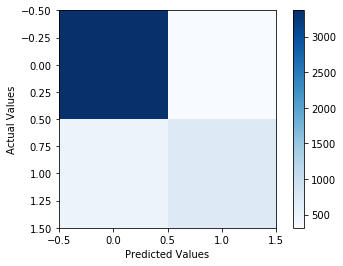

In [37]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, pred_test)
fig, ax = plt.subplots()
im = ax.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set( ylabel='Actual Values',
           xlabel='Predicted Values')

In [38]:
cfm

array([[3367,  315],
       [ 488,  715]], dtype=int64)

In [17]:
#with all features
X1,y1= data.drop(['income'], axis = 1),data['income']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .15, random_state = 17)
tree1 = DecisionTreeClassifier(random_state = 17)
tree1.fit(X1_train,y1_train)
pred_test1 = tree1.predict(X1_test)
accuracy_score(y1_test, pred_test1)

0.8073694984646879

In [18]:
# visualization
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

In [58]:
dot_data = StringIO()
export_graphviz(decision_tree = tree, out_file = dot_data, filled = True, 
                feature_names = data.drop(['income','fnlwgt', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis = 1).columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.213198 to fit



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x7f\xff\x00\x00\x04\xcd\x08\x06\x00\x00\x00\xee/$J\x…

In [62]:
export_graphviz(decision_tree = tree, out_file = 'tree.dot', filled = True, 
                feature_names = data.drop(['income','fnlwgt', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis = 1).columns)

In [66]:
!type tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="capital-gain <= 5119.0\ngini = 0.365\nsamples = 27676\nvalue = [21038, 6638]", fillcolor="#e58139af"] ;
1 [label="marital-status <= 0.5\ngini = 0.325\nsamples = 26346\nvalue = [20974, 5372]", fillcolor="#e58139be"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="education-num <= 14.5\ngini = 0.064\nsamples = 8974\nvalue = [8677, 297]", fillcolor="#e58139f6"] ;
1 -> 2 ;
3 [label="capital-loss <= 2391.5\ngini = 0.054\nsamples = 8844\nvalue = [8599, 245]", fillcolor="#e58139f8"] ;
2 -> 3 ;
4 [label="education-num <= 12.5\ngini = 0.052\nsamples = 8833\nvalue = [8599, 234]", fillcolor="#e58139f8"] ;
3 -> 4 ;
5 [label="hours-per-week <= 49.5\ngini = 0.021\nsamples = 7018\nvalue = [6942, 76]", fillcolor="#e58139fc"] ;
4 -> 5 ;
6 [label="age <= 38.5\ngini = 0.014\nsamples = 6342\nvalue = [6298, 44]", fillcolor="#e58139fd"] ;
5 -> 6 ;
7 [label="capital-loss <= 2218.0\ngini = 0.007\nsamples = 566

1234 -> 1235 ;
1236 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
1235 -> 1236 ;
1237 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139ff"] ;
1235 -> 1237 ;
1238 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
1234 -> 1238 ;
1239 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]", fillcolor="#e58139ff"] ;
1225 -> 1239 ;
1240 [label="age <= 54.5\ngini = 0.138\nsamples = 175\nvalue = [162, 13]", fillcolor="#e58139eb"] ;
1224 -> 1240 ;
1241 [label="age <= 53.5\ngini = 0.245\nsamples = 28\nvalue = [24, 4]", fillcolor="#e58139d4"] ;
1240 -> 1241 ;
1242 [label="workclass <= 3.0\ngini = 0.117\nsamples = 16\nvalue = [15, 1]", fillcolor="#e58139ee"] ;
1241 -> 1242 ;
1243 [label="education-num <= 3.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]", fillcolor="#e58139e3"] ;
1242 -> 1243 ;
1244 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]", fillcolor="#e58139ff"] ;
1243 -> 1244 ;
1245 [label="education-num <= 4.5\ngini = 0.245

2177 -> 2178 ;
2179 [label="gini = 0.375\nsamples = 16\nvalue = [12, 4]", fillcolor="#e58139aa"] ;
2177 -> 2179 ;
2180 [label="age <= 30.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]", fillcolor="#e58139ea"] ;
2170 -> 2180 ;
2181 [label="hours-per-week <= 44.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]", fillcolor="#e58139cc"] ;
2180 -> 2181 ;
2182 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139ff"] ;
2181 -> 2182 ;
2183 [label="hours-per-week <= 46.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]", fillcolor="#e58139aa"] ;
2181 -> 2183 ;
2184 [label="gini = 0.444\nsamples = 3\nvalue = [2, 1]", fillcolor="#e581397f"] ;
2183 -> 2184 ;
2185 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
2183 -> 2185 ;
2186 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]", fillcolor="#e58139ff"] ;
2180 -> 2186 ;
2187 [label="hours-per-week <= 46.5\ngini = 0.432\nsamples = 19\nvalue = [13, 6]", fillcolor="#e5813989"] ;
2169 -> 2187 ;
2188 [label="hours-per-week

2985 [label="age <= 37.5\ngini = 0.408\nsamples = 28\nvalue = [20, 8]", fillcolor="#e5813999"] ;
2984 -> 2985 ;
2986 [label="hours-per-week <= 47.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]", fillcolor="#e58139bb"] ;
2985 -> 2986 ;
2987 [label="age <= 36.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]", fillcolor="#e58139d4"] ;
2986 -> 2987 ;
2988 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]", fillcolor="#e58139ff"] ;
2987 -> 2988 ;
2989 [label="workclass <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]", fillcolor="#e58139bf"] ;
2987 -> 2989 ;
2990 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
2989 -> 2990 ;
2991 [label="hours-per-week <= 43.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]", fillcolor="#e58139db"] ;
2989 -> 2991 ;
2992 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]", fillcolor="#e58139ff"] ;
2991 -> 2992 ;
2993 [label="hours-per-week <= 46.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]", fillcolor="#e58139aa"] ;
2991 -> 2993 ;
2994 [label

3985 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]", fillcolor="#e58139ff"] ;
3984 -> 3985 ;
3986 [label="hours-per-week <= 57.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]", fillcolor="#e5813900"] ;
3984 -> 3986 ;
3987 [label="age <= 59.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]", fillcolor="#399de5aa"] ;
3986 -> 3987 ;
3988 [label="age <= 56.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
3987 -> 3988 ;
3989 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
3988 -> 3989 ;
3990 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
3988 -> 3990 ;
3991 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]", fillcolor="#399de5ff"] ;
3987 -> 3991 ;
3992 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139ff"] ;
3986 -> 3992 ;
3993 [label="hours-per-week <= 52.5\ngini = 0.49\nsamples = 14\nvalue = [6, 8]", fillcolor="#399de540"] ;
3903 -> 3993 ;
3994 [label="age <= 55.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]

4962 -> 4984 ;
4985 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]", fillcolor="#e58139ff"] ;
4984 -> 4985 ;
4986 [label="age <= 54.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
4984 -> 4986 ;
4987 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
4986 -> 4987 ;
4988 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
4986 -> 4988 ;
4989 [label="age <= 52.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]", fillcolor="#399de5bf"] ;
4961 -> 4989 ;
4990 [label="age <= 50.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]", fillcolor="#399de57f"] ;
4989 -> 4990 ;
4991 [label="gini = 0.444\nsamples = 3\nvalue = [1, 2]", fillcolor="#399de57f"] ;
4990 -> 4991 ;
4992 [label="gini = 0.444\nsamples = 3\nvalue = [1, 2]", fillcolor="#399de57f"] ;
4990 -> 4992 ;
4993 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]", fillcolor="#399de5ff"] ;
4989 -> 4993 ;
4994 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139ff"] ;
494

5982 -> 5984 ;
5985 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
5981 -> 5985 ;
5986 [label="age <= 64.5\ngini = 0.494\nsamples = 27\nvalue = [12, 15]", fillcolor="#399de533"] ;
5980 -> 5986 ;
5987 [label="capital-gain <= 1551.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]", fillcolor="#e5813900"] ;
5986 -> 5987 ;
5988 [label="age <= 61.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]", fillcolor="#e5813919"] ;
5987 -> 5988 ;
5989 [label="workclass <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]", fillcolor="#399de57f"] ;
5988 -> 5989 ;
5990 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
5989 -> 5990 ;
5991 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
5989 -> 5991 ;
5992 [label="workclass <= 4.5\ngini = 0.492\nsamples = 16\nvalue = [9, 7]", fillcolor="#e5813939"] ;
5988 -> 5992 ;
5993 [label="age <= 62.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]", fillcolor="#e5813900"] ;
5992 -> 5993 ;
5994 [label="

6997 [label="gini = 0.444\nsamples = 3\nvalue = [1, 2]", fillcolor="#399de57f"] ;
6995 -> 6997 ;
6998 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]", fillcolor="#399de5ff"] ;
6988 -> 6998 ;
6999 [label="hours-per-week <= 35.5\ngini = 0.185\nsamples = 58\nvalue = [6, 52]", fillcolor="#399de5e2"] ;
6979 -> 6999 ;
7000 [label="workclass <= 5.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
6999 -> 7000 ;
7001 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
7000 -> 7001 ;
7002 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
7000 -> 7002 ;
7003 [label="hours-per-week <= 65.0\ngini = 0.163\nsamples = 56\nvalue = [5, 51]", fillcolor="#399de5e6"] ;
6999 -> 7003 ;
7004 [label="workclass <= 5.0\ngini = 0.14\nsamples = 53\nvalue = [4, 49]", fillcolor="#399de5ea"] ;
7003 -> 7004 ;
7005 [label="hours-per-week <= 46.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]", fillcolor="#399de5f2"] ;
7004 -> 7005 ;
7006 [label="gini 

7984 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
7983 -> 7984 ;
7985 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]", fillcolor="#399de5ff"] ;
7983 -> 7985 ;
7986 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]", fillcolor="#e58139ff"] ;
7960 -> 7986 ;
7987 [label="age <= 62.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]", fillcolor="#e58139cc"] ;
7959 -> 7987 ;
7988 [label="hours-per-week <= 53.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]", fillcolor="#e58139ea"] ;
7987 -> 7988 ;
7989 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]", fillcolor="#e58139ff"] ;
7988 -> 7989 ;
7990 [label="workclass <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]", fillcolor="#e58139aa"] ;
7988 -> 7990 ;
7991 [label="marital-status <= 5.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
7990 -> 7991 ;
7992 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
7991 -> 7992 ;
7993 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fi

In [19]:
##CROSS VALIDATION

In [22]:
from sklearn.model_selection import GridSearchCV,StratifiedKfold

ImportError: cannot import name 'StratifiedKfold' from 'sklearn.model_selection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [13]:
X2,y2 = data.drop(['income', 'workclass', 'education', 'relationship', 'race', 'sex', 'capital-loss','native-country'], axis = 1),data['income'] 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .15, random_state = 30)
tree2 = DecisionTreeClassifier(random_state = 30)
tree2.fit(X_train2,y_train2)
pred_test2 = tree2.predict(X_test2)
accuracy_score(y_test2, pred_test2)

0.8047082906857728

In [15]:
X3,y3 = data.drop(['income', 'relationship'], axis = 1),data['income'] 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = .15, random_state = 30)
tree3 = DecisionTreeClassifier(random_state = 30)
tree3.fit(X_train3,y_train3)
pred_test3 = tree3.predict(X_test3)
accuracy_score(y_test3, pred_test3)

0.8204708290685773

In [17]:
X4,y4 = data.drop(['income', 'workclass', 'education', 'relationship', 'race', 'sex','native-country'], axis = 1),data['income'] 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = .15, random_state = 30)
tree4 = DecisionTreeClassifier(random_state = 30)
tree4.fit(X_train4,y_train4)
pred_test4 = tree4.predict(X_test4)
accuracy_score(y_test4, pred_test4)

0.8192425793244626

In [19]:
X5,y5 = data.drop(['income', 'education', 'relationship', 'race', 'sex','native-country'], axis = 1),data['income'] 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = .15, random_state = 30)
tree5 = DecisionTreeClassifier(random_state = 30)
tree5.fit(X_train5,y_train5)
pred_test5 = tree5.predict(X_test5)
accuracy_score(y_test5, pred_test5)

0.8137154554759468

In [6]:
X6,y6 = data.drop(['income', 'workclass', 'occupation', 'relationship', 'race', 'sex', 'capital-loss','native-country'], axis = 1),data['income'] 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = .15, random_state = 30)
tree6 = DecisionTreeClassifier(random_state = 30)
tree6.fit(X_train6,y_train6)
pred_test6 = tree6.predict(X_test6)
accuracy_score(y_test6, pred_test6)

0.8079836233367451

In [10]:
X7,y7 = data.drop(['income', 'workclass', 'relationship', 'race', 'sex','native-country'], axis = 1),data['income'] 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = .15, random_state = 30)
tree7 = DecisionTreeClassifier(random_state = 30)
tree7.fit(X_train7,y_train7)
pred_test7 = tree7.predict(X_test7)
accuracy_score(y_test7, pred_test7)

0.8190378710337769

In [12]:
X8,y8 = data.drop(['income', 'relationship', 'race', 'sex','native-country'], axis = 1),data['income'] 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size = .15, random_state = 30)
tree8 = DecisionTreeClassifier(random_state = 30)
tree8.fit(X_train8,y_train8)
pred_test8 = tree8.predict(X_test8)
accuracy_score(y_test8, pred_test8)

0.8114636642784033